# WWR Data Pre-processing Task - 2

__Problem Statement:__ Use a filter to remove outliers in the data. Sort the data by rainfall and temperature and then create a regression plot.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import interpolate, stats
import math
import sklearn as skl

In [2]:
print(os.listdir())

['.git', '.ipynb_checkpoints', 'rainYearly.csv', 'tempYearly.csv', 'WWR-Task 2.ipynb']


In [3]:
df1 = pd.read_csv('rainYearly.csv')

In [4]:
df1.head()

,Year,Rainfall
0,1956,1.01
1,1957,1.66
2,1958,3.50
3,1959,3.31
4,1960,3.61


In [5]:
df2 = pd.read_csv('tempYearly.csv')

In [6]:
df2.head()

,Year,Temperature
0,1956,16.99
1,1957,10.34
2,1958,21.01
3,1959,23.68
4,1960,24.59


In [7]:
df1.describe()

,Year,Rainfall
count,61.000000,61.000000
mean,1986.442623,3.428197
std,18.185640,2.885936
min,1956.000000,1.010000
25%,1971.000000,2.000000
50%,1986.000000,3.000000
75%,2002.000000,3.610000
max,2017.000000,23.000000


In [8]:
df2.describe()

,Year,Temperature
count,62.000000,62.000000
mean,1986.500000,18.582581
std,18.041619,24.317489
min,1956.000000,-140.450000
25%,1971.250000,14.792500
50%,1986.500000,17.980000
75%,2001.750000,23.965000
max,2017.000000,100.580000


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      61 non-null     int64  
 1   Rainfall  61 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         62 non-null     int64  
 1   Temperature  62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [11]:
df1.isnull().sum()

Year        0
Rainfall    0
dtype: int64

In [12]:
df2.isnull().sum()

Year           0
Temperature    0
dtype: int64

In [13]:
df1[df1['Rainfall'] < 0]

,Year,Rainfall


In [14]:
df1.sort_values(by=['Year'], inplace=True)

In [15]:
df2.sort_values(by=['Year'], inplace=True)

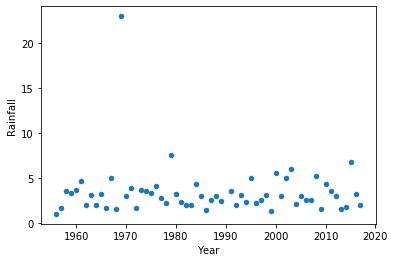

In [16]:
df1.plot.scatter(x='Year', y='Rainfall')

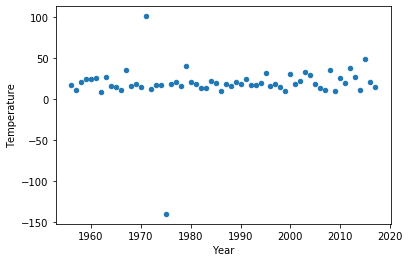

In [17]:
df2.plot.scatter(x='Year', y='Temperature')

In [18]:
df_use = pd.merge(df2, df1, how='left')

In [19]:
df_use

,Year,Temperature,Rainfall
0,1956,16.99,1.01
1,1957,10.34,1.66
2,1958,21.01,3.50
3,1959,23.68,3.31
4,1960,24.59,3.61
...,...,...,...
57,2013,26.41,1.50
58,2014,11.24,1.76
59,2015,48.27,6.73
60,2016,20.29,3.21


In [20]:
is_nan = df_use.isnull()
row_has_nan = is_nan.any(axis=1)
rows_with_nan = df_use[row_has_nan]
rows_with_nan

,Year,Temperature,Rainfall
34,1990,17.78,NaN


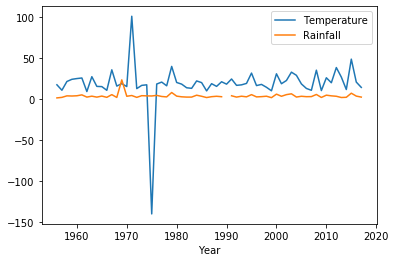

In [21]:
df_use.plot.line(x='Year')

In [22]:
df_replace_null = df_use.interpolate(method='linear',axis=0)

In [23]:
df_replace_null.iloc[33:36]

,Year,Temperature,Rainfall
33,1989,20.69,2.450
34,1990,17.78,3.025
35,1991,24.06,3.600


In [24]:
df = df_replace_null.copy()

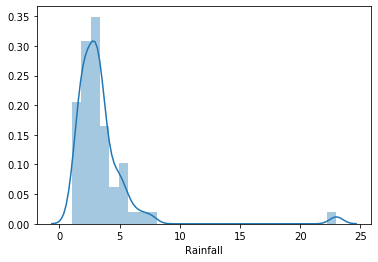

In [25]:
sb.distplot(df['Rainfall'])

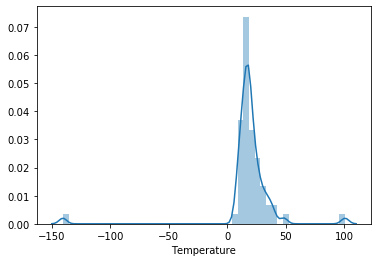

In [26]:
sb.distplot(df['Temperature'])

In [27]:
df['Rainfall'].skew()

5.458913211985338

In [28]:
df['Temperature'].skew()

-4.0243612843718735

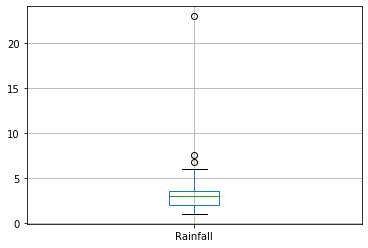

In [29]:
df.boxplot(column='Rainfall')

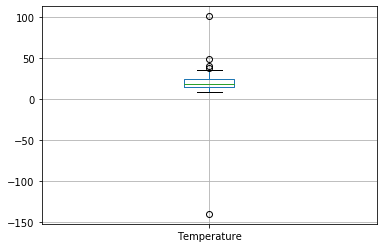

In [30]:
df.boxplot(column='Temperature')

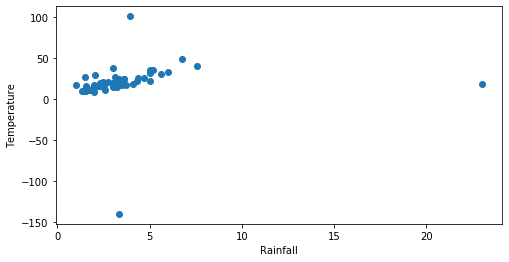

In [31]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df.Rainfall, df.Temperature)
ax.set_xlabel('Rainfall')
ax.set_ylabel('Temperature')
plt.show()

For a small scale dataset, Z-Score gives a more accurate result.

In [32]:
Q1_rain = np.percentile(df.Rainfall, 25)
Q3_rain = np.percentile(df.Rainfall, 75)

In [33]:
IQR_rain = Q3_rain - Q1_rain
IQR_rain

1.5949999999999998

In [34]:
lower_rain = Q1_rain - (1.5*IQR_rain)
upper_rain = Q3_rain + (1.5*IQR_rain)

In [35]:
upper_rain, lower_rain

(6.0, -0.37999999999999945)

In [36]:
df[(df['Rainfall'] < lower_rain) | (df['Rainfall'] > upper_rain)]

,Year,Temperature,Rainfall
13,1969,18.43,23.00
23,1979,39.42,7.58
59,2015,48.27,6.73


In [37]:
df[df['Rainfall'] < df['Rainfall'].quantile(0.01)]

,Year,Temperature,Rainfall
0,1956,16.99,1.01


In [38]:
df[df['Rainfall'] > df['Rainfall'].quantile(0.99)]

,Year,Temperature,Rainfall
13,1969,18.43,23.0


In [39]:
Q1_temp = np.percentile(df.Temperature, 25)
Q3_temp = np.percentile(df.Temperature, 75)

In [40]:
IQR_temp = Q3_temp - Q1_temp
IQR_temp

9.172499999999998

In [41]:
lower_temp = Q1_temp - (1.5*IQR_temp)
upper_temp = Q3_temp + (1.5*IQR_temp)

In [42]:
df[(df['Temperature'] < lower_temp) | (df['Temperature'] > upper_temp)]

,Year,Temperature,Rainfall
15,1971,100.58,3.92
19,1975,-140.45,3.35
23,1979,39.42,7.58
56,2012,38.01,3.00
59,2015,48.27,6.73


In [43]:
df[df['Temperature'] < df['Temperature'].quantile(0.01)]

,Year,Temperature,Rainfall
19,1975,-140.45,3.35


In [44]:
df[df['Temperature'] > df['Temperature'].quantile(0.99)]

,Year,Temperature,Rainfall
15,1971,100.58,3.92


In [45]:
threshold = 3
zscore_rain = np.abs(stats.zscore(df['Rainfall']))
df['Rainfall'].iloc[zscore_rain > threshold]

13    23.0
Name: Rainfall, dtype: float64

In [46]:
zscore_temp = np.abs(stats.zscore(df['Temperature']))
df['Temperature'].iloc[zscore_temp > threshold]

15    100.58
19   -140.45
Name: Temperature, dtype: float64

In [47]:
df['Z-Score Rain'] = pd.Series(zscore_rain)
df['Z-Score Temp'] = pd.Series(zscore_temp)

In [48]:
df = df.drop(df[(df['Z-Score Rain'] > threshold) | (df['Z-Score Temp'] > threshold)].index)

In [49]:
df = df.drop(['Z-Score Rain', 'Z-Score Temp'], axis=1)
df

,Year,Temperature,Rainfall
0,1956,16.99,1.010
1,1957,10.34,1.660
2,1958,21.01,3.500
3,1959,23.68,3.310
4,1960,24.59,3.610
5,1961,25.29,4.710
6,1962,8.77,2.000
7,1963,26.88,3.120
8,1964,15.04,1.960
9,1965,14.78,3.230


In [50]:
df.reset_index().drop(['index'], axis=1).head()

,Year,Temperature,Rainfall
0,1956,16.99,1.01
1,1957,10.34,1.66
2,1958,21.01,3.50
3,1959,23.68,3.31
4,1960,24.59,3.61


In [51]:
normalized_rain = stats.boxcox(df['Rainfall'])

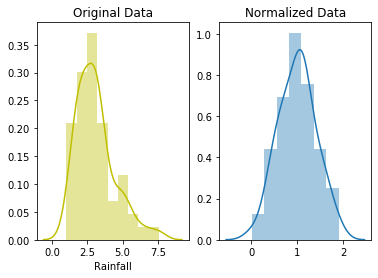

In [52]:
fig, rain = plt.subplots(1,2)
sb.distplot(df['Rainfall'], ax=rain[0], color='y')
rain[0].set_title('Original Data')
sb.distplot(normalized_rain[0], ax=rain[1])
rain[1].set_title('Normalized Data')
plt.show()

In [53]:
normalized_temp = stats.boxcox(df['Temperature'])

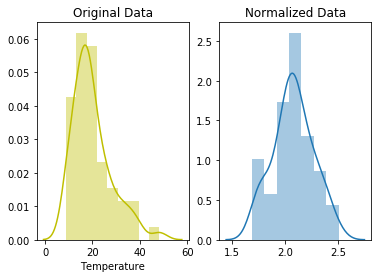

In [54]:
fig, temp = plt.subplots(1,2)
sb.distplot(df['Temperature'], ax=temp[0], color='y')
temp[0].set_title('Original Data')
sb.distplot(normalized_temp[0], ax=temp[1])
temp[1].set_title('Normalized Data')
plt.show()

In [55]:
df.sort_values(['Rainfall', 'Temperature'], ascending=[True, True])

,Year,Temperature,Rainfall
0,1956,16.99,1.010
43,1999,9.68,1.320
30,1986,9.55,1.450
57,2013,26.41,1.500
53,2009,9.94,1.560
12,1968,15.42,1.570
1,1957,10.34,1.660
16,1972,12.33,1.670
10,1966,10.27,1.710
58,2014,11.24,1.760


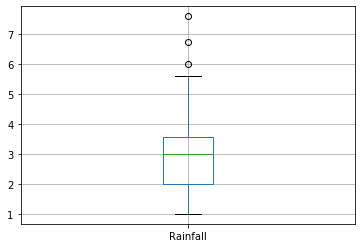

In [56]:
df.boxplot(column='Rainfall')

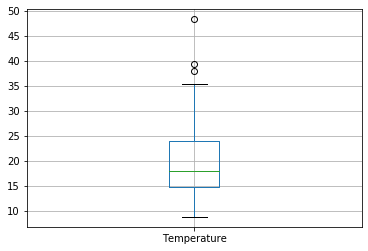

In [57]:
df.boxplot(column='Temperature')

In [58]:
sb.set_style('darkgrid', {'xtick.major.size':8, 'ytick.major.size':8})
sb.set_context('notebook')

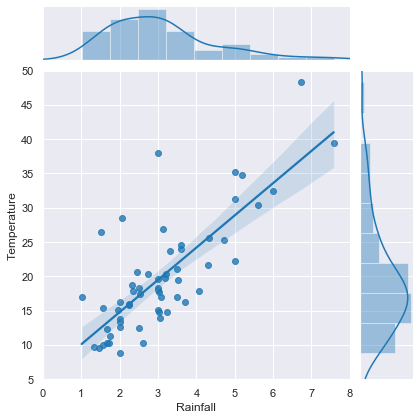

In [59]:
sns = sb.jointplot(x='Rainfall', y='Temperature', data=df, kind='reg', xlim=(0,8), ylim=(5,50))
sns.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(1))
sns.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()